In [ ]:
!pip install geopandas 
!pip install contextily

     |████████████████████████████████| 1.0 MB 3.4 MB/s 
     |████████████████████████████████| 6.3 MB 49.7 MB/s 
     |████████████████████████████████| 16.7 MB 424 kB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily
import geopandas as gpd
import xyzservices.providers as xyz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Corsi_acqua = geopandas.read_file("/content/drive/MyDrive/Corsi_acqua_Piano_di_Gestione")
Corsi_acqua

In [ ]:
Regioni = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Reg01012021_g")
Regioni

In [ ]:
province = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/ProvCM01012021_g")
province

### Esercizio 1 (3 pt.) Dato il nome di una regione (inserito dall'utente), calcolare la dimensione media della superficie delle sue province. Visualizzare pol sulla mappa la regione e le province, facendo in modo che le province con una superfice inferiore alla media siano colorate di verde mentre le altre siano colorato di rossa. Visualizzare anche i nomi delle province, Controllare che il nome della regione sia presente nel dataset: in caso negativo dare un messaggio di errore. 

Inserisci il nome della regione: Calabria


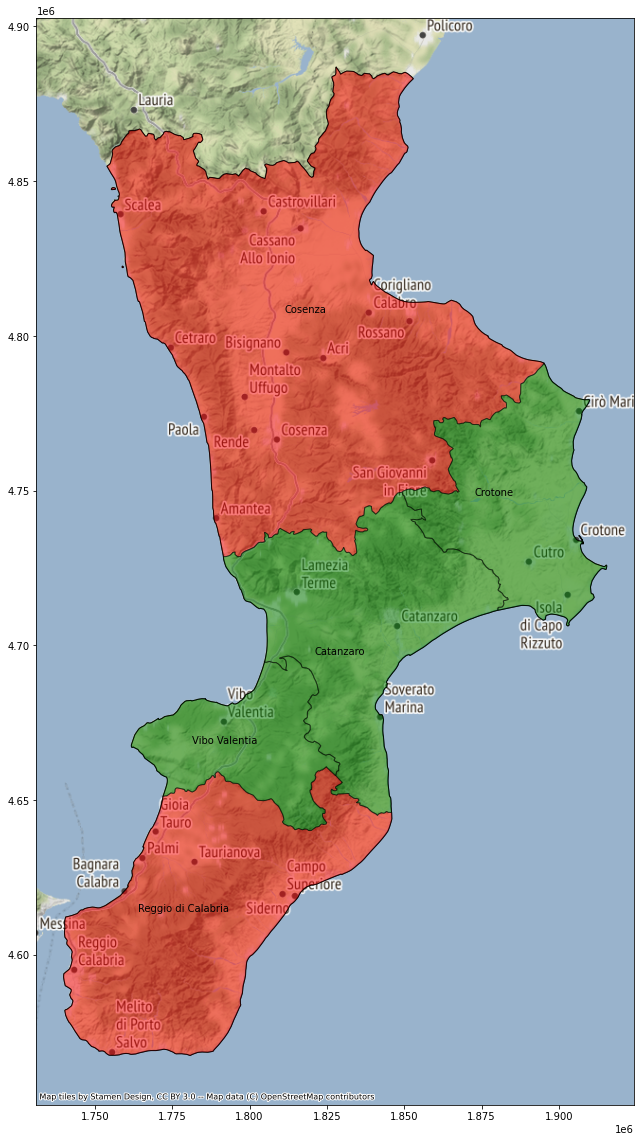

In [ ]:
nome_regione = input("Inserisci il nome della regione: ")
if nome_regione in list(Regioni["DEN_REG"]):
  regione = Regioni[Regioni["DEN_REG"]== nome_regione]
  prov_reg = province[province.within(regione.geometry.squeeze())]
  media = prov_reg["Shape_Area"].mean()
  prov_sup = prov_reg[prov_reg["Shape_Area"]>= media]
  prov_inf = prov_reg[prov_reg["Shape_Area"]< media]

  prov_reg3857 = prov_reg.to_crs(epsg=3857)
  prov_reg3857["coords"] = prov_reg3857["geometry"].apply(lambda x: x.representative_point().coords[:])
  prov_reg3857["coords"] = [coords[0] for coords in prov_reg3857["coords"]]

  ax= regione.to_crs(epsg=3857).plot(figsize=(20,20),facecolor="none", edgecolor= "k")
  prov_sup.to_crs(epsg= 3857).plot(ax=ax, facecolor = "red",alpha=0.5, edgecolor= "k")
  prov_inf.to_crs(epsg= 3857).plot(ax=ax, facecolor = "green",alpha=0.5, edgecolor= "k")
  contextily.add_basemap(ax, crs=3857)

  for idx, row in prov_reg3857.iterrows():
    plt.annotate(s=row["DEN_UTS"],xy=row["coords"], horizontalalignment="center",color="k" )

else:
  print("Non esiste")

In [ ]:
#nome_regione = input("inserire il nome della regione: ")
#Regione = Regioni[Regioni.DEN_REG == nome_regione]
#Regione

In [ ]:
#Regione_prov = province[province.within(Regione.geometry.squeeze())]
#Regione_prov

In [ ]:
#regione_me = Regione_prov["Shape_Area"].mean()
#regione_me

In [ ]:
#prov_inf = Regione_prov[Regione_prov.Shape_Area < regione_me]
#prov_inf

In [ ]:
#ax = Regione_prov.to_crs(epsg=3857).plot(figsize= (15, 15), facecolor= "red",alpha = 0.5, linewidth= 3, edgecolor= "k")
#prov_inf.to_crs(epsg=3857).plot(ax=ax, facecolor= "Green", linewidth= 3,alpha = 0.5 )
#contextily.add_basemap(ax=ax)

### Esercizio 2 (3 pt.) Cercare la provincia che ha la superficie maggiore. Visualizzare poi su una mappa la provincia con la superficie maggiore e tutte le province con cui confina. Colorare di verde la provincia più estesa e di gialio le province confinanti

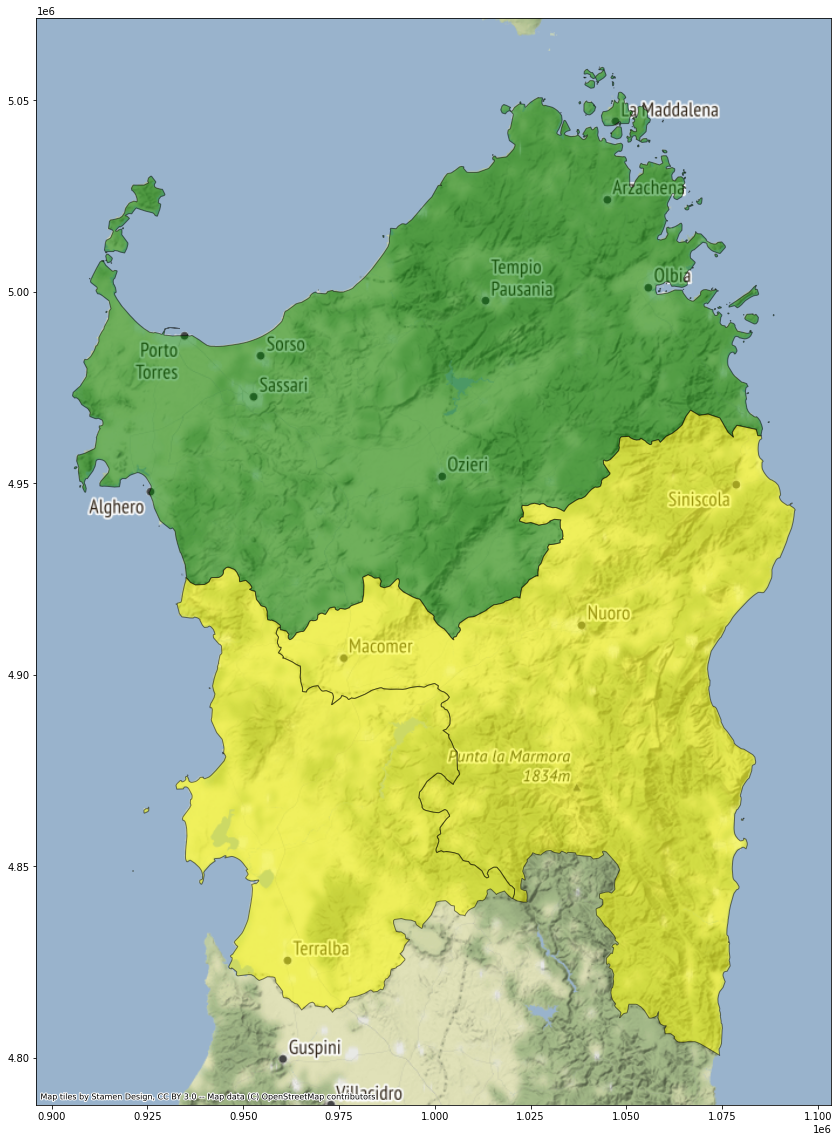

In [ ]:
max = province[province.Shape_Area == province.Shape_Area.max()]
tocca = province[province.touches(max.geometry.squeeze())]
ax = max.to_crs(epsg=3857).plot(figsize =(20,20), facecolor = "green", edgecolor = "k", alpha = 0.5)
tocca.to_crs(epsg=3857).plot(ax=ax, facecolor = "yellow", edgecolor = "k", alpha = 0.5)
contextily.add_basemap(ax, crs=3857)

### Esercizio 3 (3 pt.) Estrarre dalle province le province lombarde. Utilizzare poi il dataset cosi ottenuto per visualizzare le province attraversate da un corso d'acqua inserito dall'utente. Visualizzare infine le province e il corso d'acqua su una mappa. Controllare che il nome del corso d'acqua sia presente nel dataset: in caso negativo dare un messaggio di errore.


inserisci corso: Lambro (Fiume)


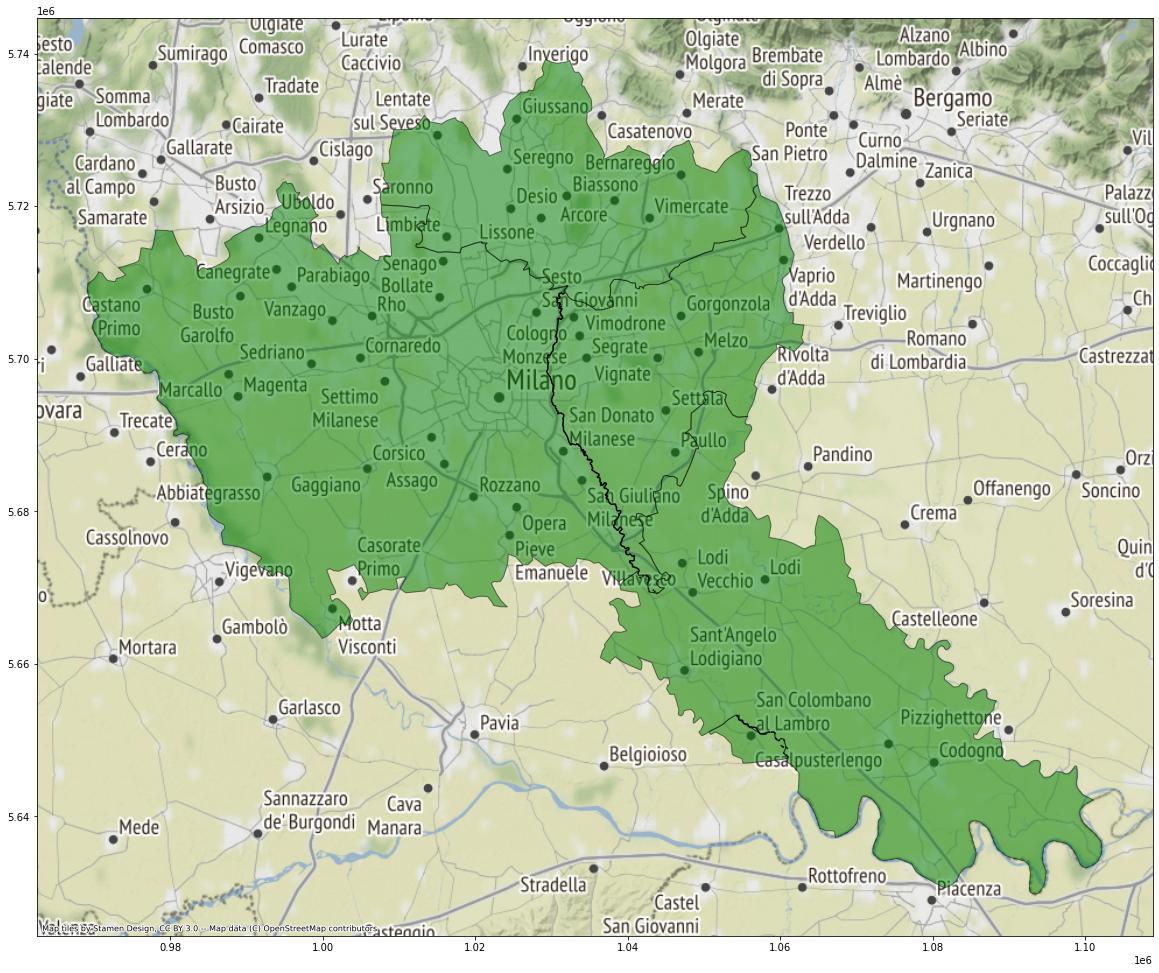

In [ ]:
lombardia = Regioni.loc[Regioni.DEN_REG == "Lombardia"]
proLom = province[province.within(lombardia.geometry.squeeze())]
input_corsi = input("inserisci corso: ")
if input_corsi in list(Corsi_acqua.NOME):
  corso = Corsi_acqua.loc[Corsi_acqua.NOME == input_corsi]
  prov_corso = proLom[proLom.intersects(corso.unary_union)]
  ax = prov_corso.to_crs(epsg=3857).plot(figsize =(20,20), facecolor = "green", edgecolor = "k", alpha = 0.5)
  corso.to_crs(epsg=3857).plot(ax=ax, color = "k")
  contextily.add_basemap(ax)
else:
  print("non esiste")